In [1]:
import pandas as pd
from feature_clustering.feature_clustering import FeatureCluster

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\umap\distances.py:

In [2]:
data = pd.read_csv("../data/datos_income_TFM.csv", sep=",")
data.head()

,X.STATE,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,...,EMPLOY1.6,EMPLOY1.7,EMPLOY1.8,X.IMPRACE.1,X.IMPRACE.2,X.IMPRACE.3,X.IMPRACE.4,X.IMPRACE.5,X.IMPRACE.6,VO_CORAZON
0,5039877,1,3,3,30,3,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,5039877,1,2,0,0,0,1,1,1,4,...,0,1,0,0,1,0,0,0,0,0
2,5039877,1,2,0,0,0,1,1,0,4,...,0,1,0,0,1,0,0,0,0,0
3,5039877,1,4,0,0,0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
4,5039877,1,3,0,0,0,1,1,0,4,...,0,1,0,1,0,0,0,0,0,0


In [3]:
target = "DIABETE4"

feature_cluster = FeatureCluster()
feature_cluster.fit(data.drop(columns=target), data[target])

c:\Users\guill\miniconda3\envs\postdegree\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


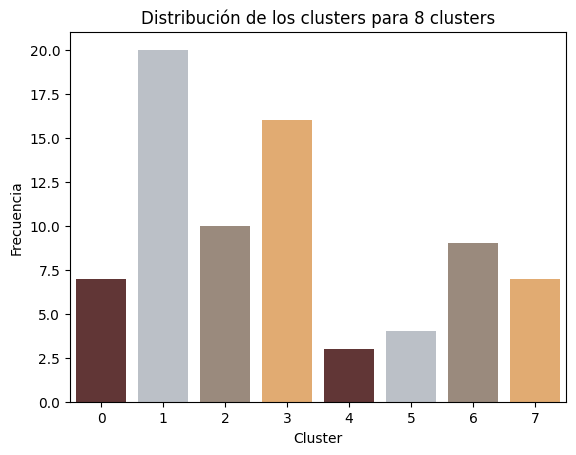

In [4]:
feature_cluster.plot()

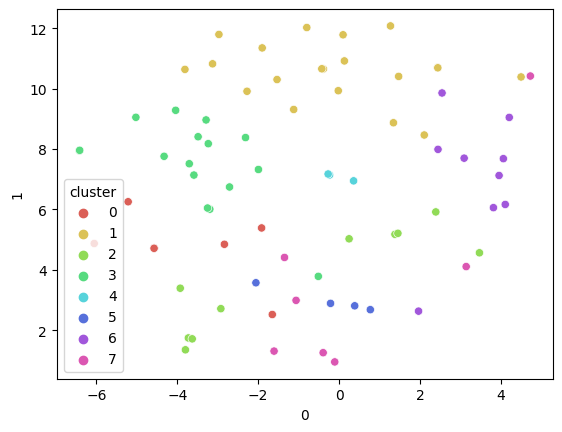

In [5]:
feature_cluster.plot(plot_type="tsne")

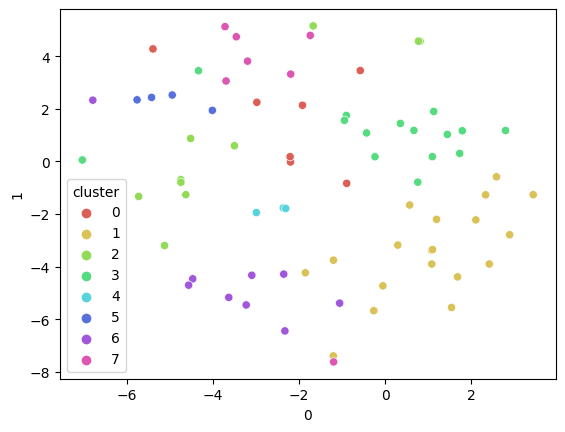

In [6]:
feature_cluster.plot(plot_type="tsne")

In [7]:
feature_cluster.score()

{'Silhouette Coefficient': 0.0410550936059662,
 'Calinski-Harabasz Index': 2.362433798466938,
 'Davies-Bouldin Index': 2.8598210510761675,
 'Dunn Index': 0.7110143263585732}

In [8]:
feature_cluster.get_feature_clusters()

{0: ['MEDCOST',
  'SMOKE100',
  'SMOKDAY2',
  'MARITAL.2',
  'EMPLOY1.3',
  'EMPLOY1.4',
  'X.IMPRACE.4'],
 1: ['SEXVAR',
  'PERSDOC2',
  'CHECKUP1',
  'SLEPTIM1',
  'CVDSTRK3',
  'CHCSCNCR',
  'CHCOCNCR',
  'HAVARTH4',
  'CHCKDNY2',
  'DIABAGE3',
  'RMVTETH4',
  'DEAF',
  'FLUSHOT7',
  'X.AGEG5YR',
  'X.AGE80',
  'MARITAL.3',
  'RENTHOM1.1',
  'EMPLOY1.7',
  'X.IMPRACE.1',
  'VO_CORAZON'],
 2: ['WEIGHT2',
  'HEIGHT3',
  'USENOW3',
  'ALCDAY5',
  'DRNK3GE5',
  'MAXDRNKS',
  'HIVRISK5',
  'ECIGNOW',
  'EMPLOY1.1',
  'EMPLOY1.2'],
 3: ['PHYSHLTH',
  'MENTHLTH',
  'POORHLTH',
  'ASTHMA3',
  'ASTHNOW',
  'CHCCOPD2',
  'ADDEPEV3',
  'BLIND',
  'DECIDE',
  'DIFFWALK',
  'DIFFDRES',
  'DIFFALON',
  'FALL12MN',
  'CIMEMLOS',
  'EMPLOY1.8',
  'X.IMPRACE.2'],
 4: ['LCSFIRST', 'LCSLAST', 'LCSNUMCG'],
 5: ['MARITAL.5', 'RENTHOM1.3', 'EMPLOY1.6', 'X.IMPRACE.6'],
 6: ['GENHLTH',
  'HLTHPLN1',
  'EXERANY2',
  'LASTDEN4',
  'EDUCA',
  'SEATBELT',
  'X.INCOMG',
  'MARITAL.1',
  'X.IMPRACE.3'],
 7: ['X.